# Setting up

In [1]:
!rm -rf sample_data

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
!cp -r drive/MyDrive/newz-aware/ /content/newz-aware

In [5]:
%cd newz-aware/

/content/newz-aware


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
!python -m spacy download en_core_web_sm

2024-03-10 16:50:18.854132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-03-10 16:50:18.854184: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl#egg=en_core_web_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)


# Preprocessing Data

In [26]:
df = pd.read_csv('TrainingData/scrapedDataset.csv')

X = df['title']
y = df['bias']

In [27]:
import spacy
from nltk.corpus import stopwords
import re

class PreProcessor:

    def __init__(self, lang = 'english'):
        self.nlp = spacy.load('en_core_web_sm')
        self.stop_words = set(stopwords.words(lang))

    def remove_special_chars(self, doc):

        doc = " ".join(re.findall(r'[a-zA-Z0-9]+', doc))
        return doc.lower()

    def lemmatize(self, doc):
        doc = self.nlp(doc)
        tokenized = [token.lemma_ for token in doc]
        return tokenized

    def remove_stop_words(self, tokenized_doc):

        tokenized_doc_no_stopwords = []

        for word in tokenized_doc:
            if word not in self.stop_words:
                tokenized_doc_no_stopwords.append(word)

        return tokenized_doc_no_stopwords

    def forward(self, doc):
        doc = self.remove_special_chars(doc)
        doc = self.lemmatize(doc)
        doc = self.remove_stop_words(doc)

        return " ".join(doc)

preproc = PreProcessor()

for i,x in enumerate(X):
    X[i] = preproc.forward(str(X[i]))
X.head()

<ipython-input-27-70524ce359eb>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = preproc.forward(str(X[i]))


0       zimmerman verdict renew focus stand ground law
1    senate immigration bill pass judiciary committ...
2    let doma fool supreme court restrict right was...
3    obamacare trouble exchange provision delay law...
4    exclusive immigration agent rip house lawmaker...
Name: title, dtype: object

In [28]:
y.replace(to_replace = list(range(-4,5)), value=[0,0,0,1,1,1,2,2,2], inplace=True)
y.value_counts()

1    17510
2     1878
0     1616
Name: bias, dtype: int64

In [29]:
df = pd.concat([X,y], axis=1)
df

,title,bias
0,zimmerman verdict renew focus stand ground law,1
1,senate immigration bill pass judiciary committ...,1
2,let doma fool supreme court restrict right was...,1
3,obamacare trouble exchange provision delay law...,1
4,exclusive immigration agent rip house lawmaker...,1
...,...,...
20999,dana milbank senator turn table cayman investo...,2
21000,republicans hatred obama blind public disinter...,2
21001,dana milbank stockman step forward republican ...,1
21002,e j dionne republican problem solver washingto...,2


In [30]:
df.drop(df[df['title']=='nan'].index, inplace=True)

In [31]:
df_class0 = df[df['bias'] == 0]
df_class1 = df[df['bias'] == 1]
df_class2 = df[df['bias'] == 2]

In [32]:
df_class0_oversampled = df_class0.sample(df_class1.shape[0], replace = True)
df_class2_oversampled = df_class2.sample(df_class1.shape[0], replace = True)

print(df_class0_oversampled.shape)
print(df_class2_oversampled.shape)

(12098, 2)
(12098, 2)


In [33]:
df_oversampled = pd.concat([df_class1, df_class0_oversampled, df_class2_oversampled], axis = 0)
print(df_oversampled.shape)
print(df_oversampled['bias'].value_counts())

(36294, 2)
1    12098
0    12098
2    12098
Name: bias, dtype: int64


In [34]:
df = df_oversampled

In [35]:
X = df['title']
y = df['bias']

In [36]:
from sklearn.model_selection import train_test_split
train_X, t_X, train_y, t_y = train_test_split(X, y, test_size=0.2, random_state=101)
test_X, dev_X, test_y, dev_y = train_test_split(t_X, t_y, test_size=0.5, random_state=101)

In [37]:
train_X_orig = train_X.copy(deep=True)
dev_X_orig = dev_X.copy(deep=True)
test_X_orig = test_X.copy(deep=True)

train_y_orig = train_y.copy(deep=True)
dev_y_orig = dev_y.copy(deep=True)
test_y_orig = test_y.copy(deep=True)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 8000, lowercase=False, ngram_range=(1,2))
train_X = vectorizer.fit_transform(train_X).toarray()
dev_X = vectorizer.transform(dev_X).toarray()
test_X = vectorizer.transform(test_X).toarray()

In [39]:
import joblib
joblib.dump(vectorizer, 'tfidf_for_bias.pkl')

['tfidf_for_bias.pkl']

## Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_X, train_y)

MultinomialNB()

In [41]:
import joblib

joblib.dump(classifier, 'naiveBayesModel.pkl')

['naiveBayesModel.pkl']

## Evaluation

In [42]:
dev_pred = classifier.predict(dev_X)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(dev_y, dev_pred))
print(classification_report(dev_y, dev_pred))

[[991 243  42]
 [181 925 116]
 [ 92 255 785]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1276
           1       0.65      0.76      0.70      1222
           2       0.83      0.69      0.76      1132

    accuracy                           0.74      3630
   macro avg       0.76      0.74      0.75      3630
weighted avg       0.75      0.74      0.75      3630



In [44]:
test_pred = classifier.predict(test_X)

In [45]:
print(confusion_matrix(test_y, test_pred))
print(classification_report(test_y, test_pred))

[[933 222  57]
 [152 941 128]
 [ 91 286 819]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1212
           1       0.65      0.77      0.70      1221
           2       0.82      0.68      0.74      1196

    accuracy                           0.74      3629
   macro avg       0.75      0.74      0.74      3629
weighted avg       0.75      0.74      0.74      3629



In [46]:
classifier.predict_proba(test_X)

array([[0.0242958 , 0.52895636, 0.44674784],
       [0.98503812, 0.01308277, 0.00187911],
       [0.0455881 , 0.91767069, 0.03674121],
       ...,
       [0.08105345, 0.6786424 , 0.24030415],
       [0.15696749, 0.80557192, 0.0374606 ],
       [0.02179904, 0.56598732, 0.41221365]])

# Random Forest Classifier

In [47]:
train_X = train_X_orig.copy(deep=True)
dev_X = dev_X_orig.copy(deep=True)
test_X = test_X_orig.copy(deep=True)

train_y = train_y_orig.copy(deep=True)
dev_y = dev_y_orig.copy(deep=True)
test_y = test_y_orig.copy(deep=True)

In [49]:
train_X = vectorizer.transform(train_X).toarray()
dev_X = vectorizer.transform(dev_X).toarray()
test_X = vectorizer.transform(test_X).toarray()

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

RandomForestClassifier()

In [51]:
import joblib

joblib.dump(rfc, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

## Evaluation

In [52]:
dev_pred = rfc.predict(dev_X)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(dev_y, dev_pred))
print(classification_report(dev_y, dev_pred))

[[1215   43   18]
 [ 136 1001   85]
 [  85   44 1003]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1276
           1       0.92      0.82      0.87      1222
           2       0.91      0.89      0.90      1132

    accuracy                           0.89      3630
   macro avg       0.89      0.89      0.89      3630
weighted avg       0.89      0.89      0.89      3630



In [54]:
test_pred = rfc.predict(test_X)

In [55]:
print(confusion_matrix(test_y, test_pred))
print(classification_report(test_y, test_pred))

[[1159   33   20]
 [ 126  999   96]
 [  75   43 1078]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1212
           1       0.93      0.82      0.87      1221
           2       0.90      0.90      0.90      1196

    accuracy                           0.89      3629
   macro avg       0.89      0.89      0.89      3629
weighted avg       0.89      0.89      0.89      3629



## ANN

In [108]:
train_X = train_X_orig.copy(deep=True)
dev_X = dev_X_orig.copy(deep=True)
test_X = test_X_orig.copy(deep=True)

train_y = train_y_orig.copy(deep=True)
dev_y = dev_y_orig.copy(deep=True)
test_y = test_y_orig.copy(deep=True)

In [109]:
train_X = vectorizer.transform(train_X).toarray()
dev_X = vectorizer.transform(dev_X).toarray()
test_X = vectorizer.transform(test_X).toarray()

In [110]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y, 3)
dev_y = to_categorical(dev_y, 3)
test_y = to_categorical(test_y, 3)

In [111]:
train_X.shape

(29035, 8000)

In [112]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

ann = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(None, 8000)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

ann.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
ann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, None, 256)         2048256   
                                                                 
 dense_19 (Dense)            (None, None, 16)          4112      
                                                                 
 dense_20 (Dense)            (None, None, 3)           51        
                                                                 
Total params: 2,052,419
Trainable params: 2,052,419
Non-trainable params: 0
_________________________________________________________________


In [113]:
history = ann.fit(train_X, train_y, validation_data=(dev_X, dev_y), epochs=20, batch_size=64)

Epoch 1/20


452/454 [============================>.] - ETA: 0s - loss: 0.6146 - accuracy: 0.7436

454/454 [==============================] - 12s 26ms/step - loss: 0.6139 - accuracy: 0.7439 - val_loss: 0.4238 - val_accuracy: 0.8275
Epoch 2/20
454/454 [==============================] - 11s 25ms/step - loss: 0.3606 - accuracy: 0.8532 - val_loss: 0.3607 - val_accuracy: 0.8556
Epoch 3/20
454/454 [==============================] - 10s 23ms/step - loss: 0.3089 - accuracy: 0.8746 - val_loss: 0.3318 - val_accuracy: 0.8736
Epoch 4/20
454/454 [==============================] - 11s 24ms/step - loss: 0.2888 - accuracy: 0.8816 - val_loss: 0.3281 - val_accuracy: 0.8774
Epoch 5/20
454/454 [==============================] - 11s 25ms/step - loss: 0.2784 - accuracy: 0.8831 - val_loss: 0.3191 - val_accuracy: 0.8854
Epoch 6/20
454/454 [==============================] - 13s 28ms/step - loss: 0.2729 - accuracy: 0.8852 - val_loss: 0.3239 - val_accuracy: 0.8829
Epoch 7/20
454/454 [==============================] - 14s 32ms/step - loss: 0.2684 - accuracy: 0.8852 - val_loss: 0.3322 - val_accuracy: 0.8771
Epo

In [114]:
test_pred = ann.predict(test_X)
test_pred = np.argmax(test_pred, axis=1)

In [118]:
test_y = np.argmax(test_y, axis=1)

In [119]:
print(confusion_matrix(test_y, test_pred))
print(classification_report(test_y, test_pred))

[[1163   32   17]
 [ 130  984  107]
 [  83   39 1074]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1212
           1       0.93      0.81      0.86      1221
           2       0.90      0.90      0.90      1196

    accuracy                           0.89      3629
   macro avg       0.89      0.89      0.89      3629
weighted avg       0.89      0.89      0.89      3629



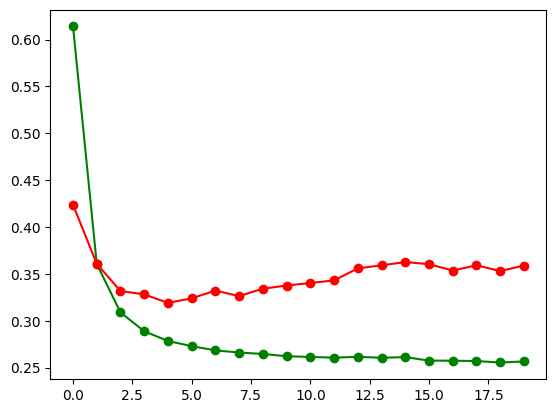

In [120]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_loss']))), history.history['val_loss'], 'r-o', label='Validation')
plt.savefig('ANN_losses.png')

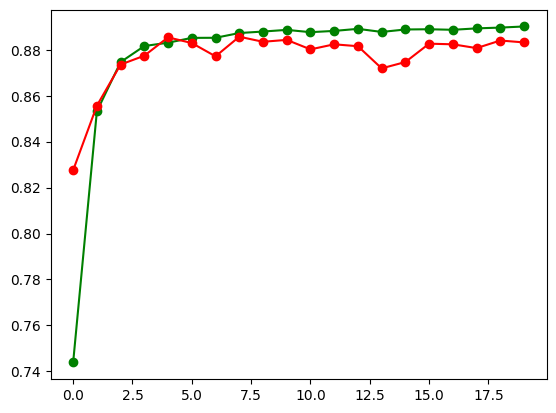

In [121]:
plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_accuracy']))), history.history['val_accuracy'], 'r-o', label='Validation')
plt.savefig('ANN_accuracies.png')

In [122]:
ann.save("ANNModel")

In [123]:
import shutil
shutil.make_archive('ANNModel', 'zip', 'ANNModel')

'/content/newz-aware/ANNModel.zip'

## LSTM

In [89]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [90]:
train_X = train_X_orig.copy(deep=True)
dev_X = dev_X_orig.copy(deep=True)
test_X = test_X_orig.copy(deep=True)

train_y = train_y_orig.copy(deep=True)
dev_y = dev_y_orig.copy(deep=True)
test_y = test_y_orig.copy(deep=True)

In [91]:
vocab_size = 10000

def lstm_preproc(X, y):
    vocab_size = 10000

    one_hot_repr = [one_hot(title, vocab_size) for title in X]
    sent_length = 20
    embedded_docs = pad_sequences(one_hot_repr, padding='pre', maxlen = sent_length)
    y = to_categorical(y, 3)

    return embedded_docs, y

In [92]:
train_X, train_y = lstm_preproc(train_X, train_y)
dev_X, dev_y = lstm_preproc(dev_X, dev_y)
test_X, test_y = lstm_preproc(test_X, test_y)

In [97]:
train_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Training

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

embedding_vector_features = 40
sent_length=20
model = Sequential([
                Embedding(vocab_size, embedding_vector_features, input_length=sent_length),
                LSTM(100),
                Dense(16, activation='relu'),
                Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense_16 (Dense)            (None, 16)                1616      
                                                                 
 dense_17 (Dense)            (None, 3)                 51        
                                                                 
Total params: 458,067
Trainable params: 458,067
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(train_X, train_y, validation_data=(dev_X, dev_y), epochs=20, batch_size=64)

Epoch 1/20
454/454 [==============================] - 25s 48ms/step - loss: 0.7643 - accuracy: 0.6500 - val_loss: 0.5690 - val_accuracy: 0.7661
Epoch 2/20
454/454 [==============================] - 37s 82ms/step - loss: 0.4668 - accuracy: 0.8093 - val_loss: 0.4602 - val_accuracy: 0.8061
Epoch 3/20
454/454 [==============================] - 38s 84ms/step - loss: 0.3847 - accuracy: 0.8427 - val_loss: 0.3870 - val_accuracy: 0.8479
Epoch 4/20
454/454 [==============================] - 19s 42ms/step - loss: 0.3438 - accuracy: 0.8612 - val_loss: 0.3803 - val_accuracy: 0.8496
Epoch 5/20
454/454 [==============================] - 21s 46ms/step - loss: 0.3256 - accuracy: 0.8678 - val_loss: 0.3749 - val_accuracy: 0.8504
Epoch 6/20
454/454 [==============================] - 24s 52ms/step - loss: 0.3126 - accuracy: 0.8734 - val_loss: 0.3797 - val_accuracy: 0.8587
Epoch 7/20
454/454 [==============================] - 37s 81ms/step - loss: 0.3038 - accuracy: 0.8758 - val_loss: 0.3603 - val_accuracy:

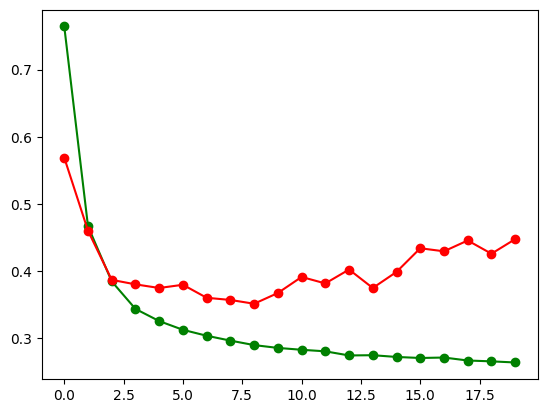

In [100]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_loss']))), history.history['val_loss'], 'r-o', label='Validation')
plt.savefig('LSTM_losses.png')

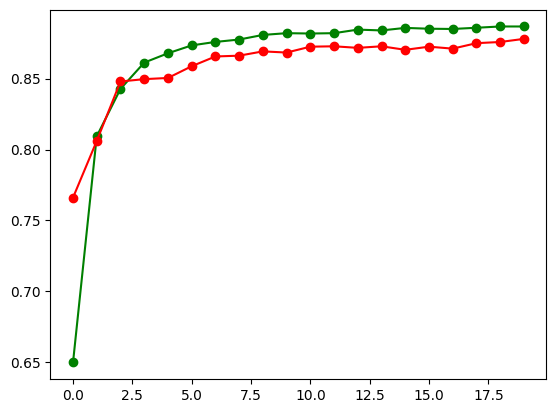

In [101]:
plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_accuracy']))), history.history['val_accuracy'], 'r-o', label='Validation')
plt.savefig('LSTM_accuracies.png')

# Evaluation

In [102]:
test_pred = model.predict(test_X)

In [103]:
test_y_dash = []
test_pred_dash = []

for i,pred in enumerate(test_y):
    test_y_dash.append(np.argmax(pred))

for i,pred in enumerate(test_pred):
    test_pred_dash.append(np.argmax(pred))

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_y_dash, test_pred_dash))
print(classification_report(test_y_dash, test_pred_dash))

[[1152   34   26]
 [ 136  966  119]
 [  71   39 1086]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1212
           1       0.93      0.79      0.85      1221
           2       0.88      0.91      0.89      1196

    accuracy                           0.88      3629
   macro avg       0.89      0.88      0.88      3629
weighted avg       0.89      0.88      0.88      3629



In [106]:
model.save("LSTMModel")

In [107]:
import shutil
shutil.make_archive('LSTMModel', 'zip', 'LSTMModel')

'/content/newz-aware/LSTMModel.zip'

# Ensemble

In [124]:
def predict_ensemble(X, y):
    X_tfidf = vectorizer.transform(X).toarray()
    X_lstm, y_lstm = lstm_preproc(X, y)
    nb_pred = classifier.predict(X_tfidf)
    rf_pred = rfc.predict(X_tfidf)
    ann_pred = np.argmax(ann.predict(X_tfidf), axis=1)
    lstm_pred = np.argmax(model.predict(X_lstm), axis=1)
    ensemble_pred = []
    for i in range(len(X)):
        vote = [nb_pred[i], rf_pred[i], ann_pred[i], lstm_pred[i]]
        if i < 10: print(vote)
        ensemble_pred.append(max(set(vote), key=vote.count))
    return ensemble_pred


In [127]:
test_X = test_X_orig.copy(deep=True)
test_y = test_y_orig.copy(deep=True)

In [133]:
print(confusion_matrix(ensemble_pred, test_y))
print(classification_report(ensemble_pred, test_y))

[[1159  130   78]
 [  33  994   42]
 [  20   97 1076]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1367
           1       0.81      0.93      0.87      1069
           2       0.90      0.90      0.90      1193

    accuracy                           0.89      3629
   macro avg       0.89      0.89      0.89      3629
weighted avg       0.90      0.89      0.89      3629

